Loading images with PIL and Tensorflow


In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [2]:
print(tf.__version__)

2.5.0


In [33]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

  6045696/228813984 [..............................] - ETA: 3:10

KeyboardInterrupt: 

In [48]:
gtrsb = '/Users/evgenytolmachev/.keras/datasets/gtrsb'
gtrsb =pathlib.Path(gtrsb)

In [49]:
gtrsb

PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb')

In [22]:
import subprocess
subprocess.call(["open", "-R", data_dir])

0

In [35]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
list(data_dir.glob('*/*.jpg'))

3670


eras/datasets/flower_photos/1/17135145776_4c2ec21b05_m.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/3365850019_8158a161a8_n.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/3533075436_0954145b9f_m.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/5643666851_dc3f42399d_m.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/8979062599_86cac547b8.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/3198028825_fdfaa1d020.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/22274701614_901606ee34_n.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/451965300_619b781dc9_m.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/14012247974_69ac128799.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photos/1/13920113_f03e867ea7_m.jpg'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/flower_photo

In [51]:
image_count = len(list(gtrb.glob('*/*.ppm')))
print(image_count)
list(gtrsb.glob('*/*.ppm'))

5430


gtrsb/1/00019_00001.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00027_00010.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00008_00026.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00036_00023.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00027_00004.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00019_00015.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00029_00027.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00038_00000.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00006_00011.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00041_00008.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00006_00005.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00038_00014.ppm'),
 PosixPath('/Users/evgenytolmachev/.keras/datasets/gtrsb/1/00017_00022.ppm'),
 PosixPath('/Users/evgenytolmachev/.k

In [38]:
roses = list(data_dir.glob('roses/*'))
roses


[]

In [39]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

IndexError: list index out of range

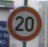

In [52]:
cat0 = list(gtrsb.glob("0/*"))
PIL.Image.open(str(cat0[1]))

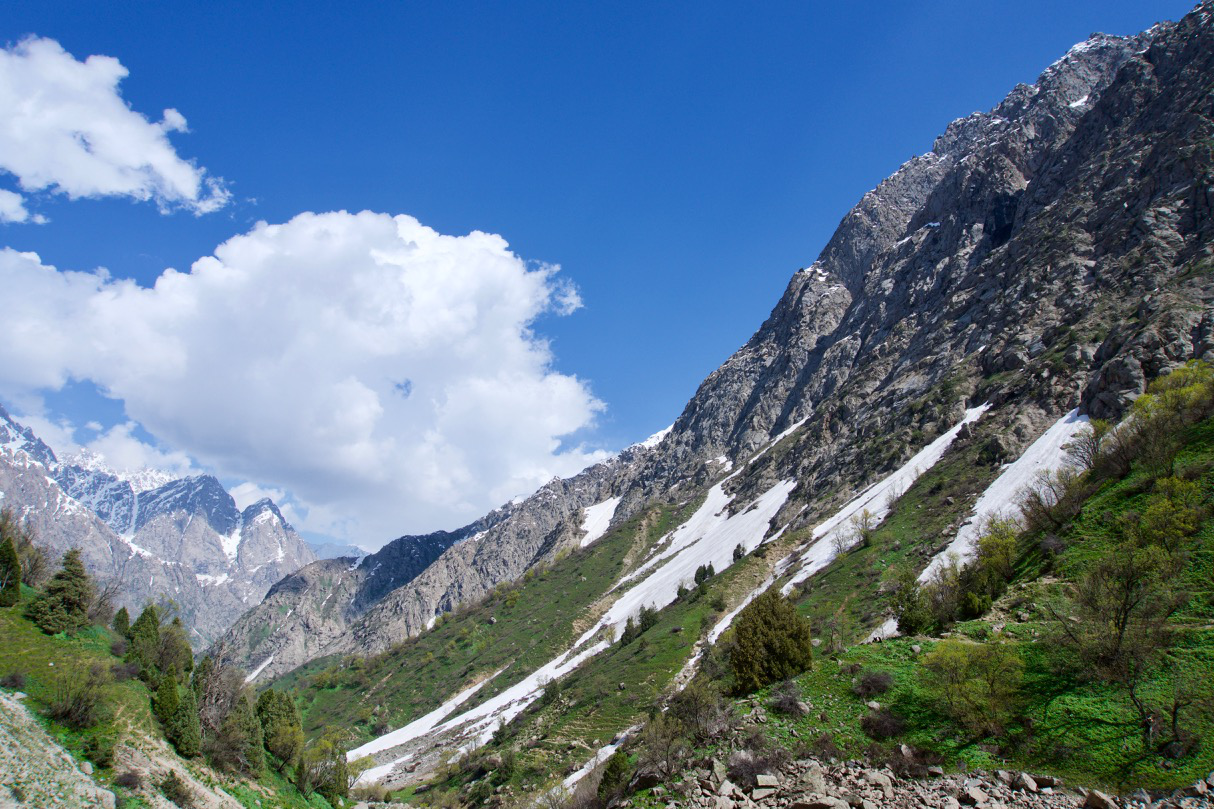

In [11]:
PIL.Image.open('/Volumes/WD Elemnts/Photos/TJ/Сиама Ущелье/DSC03584.jpg')

In [26]:
batch_size = 32
img_height = 180
img_width = 180

In [53]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  ,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 0 files belonging to 5 classes.
Using 0 files for training.


ValueError: No images found.

In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [42]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4']


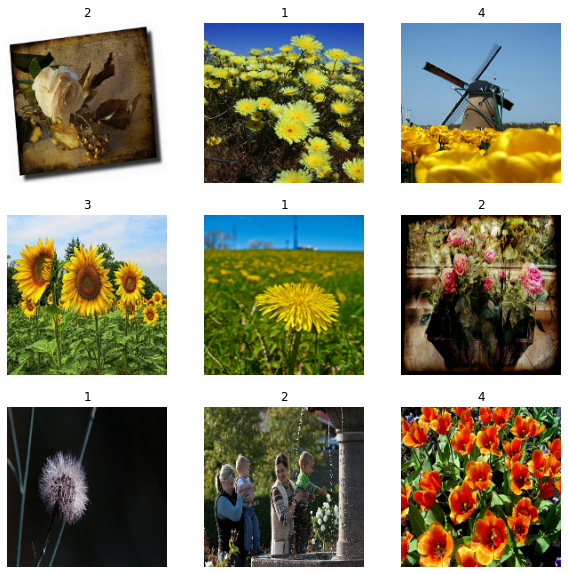

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [4]:
12425 / (12425 / 10)

10.0